<a href="https://colab.research.google.com/github/YoonieJang/CS484/blob/main/cs484_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import math
import mlxtend
import sklearn.cluster as cluster
import sklearn.neighbors
import sklearn.metrics as metrics

from numpy import linalg
from google.colab import files
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import MinMaxScaler

#### Question 4

In [ ]:
clusters =[[-2,-1,1,2,3],[4,5,7,8]]

a = sum([abs(-1 - x) for x in clusters[0]])*(1/(len(clusters[0])-1))
print(f"Average distance between the observations in cluster and all other observations in the same cluster: {a}")

b = min([1/len(clusters[1]) * sum([abs(-1 -x)for x in i]) for i in clusters if -1 not in i])
print(f"Avergae distance of the observations to its nearest neighboring cluster: {b}")

s=(b-a)/max([a,b])
print(f"\n a) Silhouette width of the observation 2 in Cluster 0: {s}")
     

Average distance between the observations in cluster and all other observations in the same cluster: 2.5
Avergae distance of the observations to its nearest neighboring cluster: 7.0

 a) Silhouette width of the observation 2 in Cluster 0: 0.6428571428571429


In [ ]:
s_c0 = (1/len(clusters[0]))*sum([abs(i-(sum(clusters[0])/len(clusters[0]))) for i in clusters[0]])
s_c1 = (1/len(clusters[1]))*sum([abs(i-(sum(clusters[1])/len(clusters[1]))) for i in clusters[1]])
print(f"b) Davies-Bouldin value of Cluster 0: {s_c0}")
print(f"   Davies-Bouldin value of Cluster 1: {s_c1}")

b) Davies-Bouldin value of Cluster 0: 1.6800000000000002
   Davies-Bouldin value of Cluster 1: 1.5


In [ ]:
m = abs((sum(clusters[0])/len(clusters[0]))-(sum(clusters[1])/len(clusters[1])))
r = (s_c0+s_c1)/m
d_b_index = (1/len(clusters))*sum([r])
print(f"c) Davies-Bouldin Index of two cluster : {d_b_index}")

c) Davies-Bouldin Index of two cluster : 0.29444444444444445


#### Question 5

In [152]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Groceries.csv']))

Saving Groceries.csv to Groceries (1).csv


In [66]:
#convert market basket data to Item List format
ListItem = df.groupby(['Customer'])['Item'].apply(list).values.tolist()
#convert Item List to the Item indicator format/ Transaction format
te = TransactionEncoder()
te_ary = te.fit(ListItem).transform(ListItem)
ItemIndicator = pd.DataFrame(te_ary, columns=te.columns_)
#at least 75 customers!-> minimun support = 75 / number of total customers
frequent_itemsets = apriori(ItemIndicator, min_support = 75/len(ListItem), use_colnames = True)
print(f"a) itemsets in total: {len(frequent_itemsets)}")
largest_kvalue=len(frequent_itemsets['itemsets'][len(frequent_itemsets)-1])
print(f"   The largest k value among our itemsets: {largest_kvalue}")

a) itemsets in total: 524
   The largest k value among our itemsets: 4


In [70]:
#discover association rules
ass_rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01)
ass_results= list(ass_rules)
print(f"b) Number of association rules: {len(ass_rules)}")

b) Number of association rules: 1228


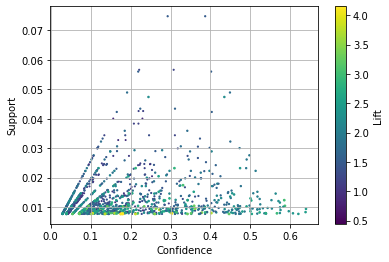

In [90]:
plt.figure(figsize=(6,4))
plt.scatter(ass_rules['confidence'], ass_rules['support'], s = ass_rules['lift'], c = ass_rules['lift'])
plt.grid(True)
plt.colorbar(label='Lift')
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.title=("c)")
plt.show()

In [150]:
assoc_rules_over60 = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.6)
assoc_rules_over60

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(root vegetables, butter)",(whole milk),0.012913,0.255516,0.008236,0.637795,2.496107,0.004936,2.055423
1,"(yogurt, butter)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,0.005613,2.061648
2,"(root vegetables, yogurt, other vegetables)",(whole milk),0.012913,0.255516,0.007829,0.606299,2.372842,0.004530,1.890989
3,"(yogurt, tropical fruit, other vegetables)",(whole milk),0.012303,0.255516,0.007626,0.619835,2.425816,0.004482,1.958317


#### Question 6

In [156]:
uploaded = files.upload()
cars = pd.read_csv(io.BytesIO(uploaded['cars.csv']))

Saving cars.csv to cars.csv


In [222]:
from sklearn.metrics.pairwise import manhattan_distances
data=cars[['Weight','Wheelbase','Length']]
data_MinMax=MinMaxScaler((0,10)).fit_transform(data)

scaled_data=pd.DataFrame(manhattan_distances(data_MinMax))
print("-----Scaled interval values with range of 0 to 10 in 'weight', 'wheelbase', and 'length' variables-----")
scaled_data

-----Scaled interval values with range of 0 to 10 in 'weight', 'wheelbase', and 'length' variables-----


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427
0,0.000000,5.831523,3.099914,2.319875,3.547757,3.523413,5.100568,3.661586,2.651659,3.268328,3.041736,2.959339,2.527911,1.930532,2.322070,1.949411,2.012929,1.766133,4.403598,2.588553,1.555606,7.629805,7.841245,7.036002,1.640270,2.380687,2.476139,2.133909,3.857355,3.793291,3.113515,3.404172,3.733760,3.733760,3.362973,3.580802,3.008646,3.498405,2.857956,3.269636,...,2.539200,2.433937,2.221144,2.498002,2.392739,4.141381,4.057112,6.275568,9.650556,3.941374,8.037650,7.082594,5.940362,2.490574,6.709155,6.324078,5.773811,7.274403,5.444223,6.783766,2.686970,1.788094,1.353637,5.152151,5.536046,5.505233,2.610585,1.245417,1.622915,5.220544,2.155404,2.411958,2.671864,2.471113,2.255757,2.372139,2.372139,2.326918,4.907021,2.037274
1,5.831523,0.000000,2.731609,4.238921,7.240704,7.265048,1.094592,2.169937,3.179865,2.563196,2.789787,2.872184,5.026101,5.623479,3.509453,3.882112,5.541082,5.998405,10.040365,3.242971,5.787879,3.120379,2.545302,3.350546,5.913741,3.450836,4.809930,6.912800,2.337804,2.401869,3.081644,2.790988,2.461400,2.461400,2.832186,5.580865,3.186513,5.663262,6.303711,8.820261,...,4.498065,4.392801,3.974016,4.539263,4.434000,8.733204,8.817474,0.807681,3.819033,2.416071,11.899136,12.854192,0.472475,7.901045,1.323325,1.076824,0.784985,1.600183,1.114573,2.090819,3.144553,4.043430,4.477886,10.983675,11.367570,1.053563,3.220938,4.586106,7.454438,0.652178,4.039756,3.783202,3.523296,5.025483,5.240838,3.459384,3.459384,5.169677,0.924502,4.885159
2,3.099914,2.731609,0.000000,1.507311,4.509094,4.533439,2.000654,0.644069,1.079834,1.037328,1.263920,1.346317,2.294491,2.891870,1.409422,1.782082,2.809473,3.266796,7.308756,1.717103,3.056269,4.529891,4.741331,4.389271,3.182132,1.924968,2.709899,4.181191,1.121078,1.057013,1.613193,1.533063,1.203475,1.203475,1.574261,2.849255,1.718062,2.931652,3.572102,6.088651,...,1.766455,1.661192,1.242406,1.807654,1.702391,6.001595,6.085865,3.175654,6.550642,2.104618,9.167527,10.122583,2.840448,5.169435,3.609241,3.224164,2.673897,4.174489,2.344309,3.683852,0.412944,1.311820,1.746277,8.252065,8.635960,2.405319,0.489329,1.854497,4.722829,2.120630,1.939725,1.683171,1.212739,2.293873,2.509229,0.727774,0.727774,2.438068,1.807107,2.153549
3,2.319875,4.238921,1.507311,0.000000,3.001783,3.026128,3.507966,2.068984,1.295011,1.675725,1.479096,1.561493,0.839614,1.384558,1.624599,1.997258,1.302161,1.759484,5.801444,1.932280,1.548958,6.037202,6.248643,5.443399,1.674820,2.140145,1.834167,3.094932,1.901116,1.837052,1.157276,1.447933,1.777521,1.777521,1.406734,1.892506,1.205966,1.810109,2.064790,4.581340,...,1.214540,1.109277,0.896484,1.173342,1.068079,4.494283,4.578553,4.682965,8.057954,2.980351,7.660215,8.615272,4.347759,3.662124,5.116553,4.731475,4.181209,5.681800,3.851621,5.191164,1.094368,0.742308,1.176765,6.744754,7.128649,3.912630,1.017983,1.495511,3.215517,3.627941,1.427629,1.171075,0.715625,0.786562,1.001917,0.779537,0.779537,0.930756,3.314419,0.646238
4,3.547757,7.240704,4.509094,3.001783,0.000000,0.024345,6.509749,5.070767,4.060839,4.677508,4.450917,4.368520,2.214603,1.617225,3.731251,3.856719,1.699622,1.781625,2.799661,3.997733,1.992151,9.038985,9.250426,8.445182,1.907487,3.999606,2.966355,3.863484,4.902899,4.838835,4.159060,4.449716,4.779304,4.779304,4.408517,1.659839,4.054191,1.577442,0.936993,1.579557,...,2.742639,2.847902,3.266688,2.701441,2.806704,1.492500,1.576770,7.684748,11.059737,4.929502,4.658432,5.613489,7.349542,3.856513,8.118336,7.733258,7.182992,8.683583,6.853404,8.192947,4.096151,3.197274,3.036226,3.742971,4.126866,6.914413,4.019766,3.354972,2.625217,6.629724,3.287090,3.457502,3.717408,2.215221,1.999866,3.781320,3.781320,2.071027,6.316202,2.355545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [223]:
maxNClusters = 10

nClusters = np.zeros(maxNClusters)
Elbow = np.zeros(maxNClusters)
Silhouette = np.zeros(maxNClusters)
Calinski_Harabasz = np.zeros(maxNClusters)
Davies_Bouldin = np.zeros(maxNClusters)
TotalWCSS = np.zeros(maxNClusters)
Inertia = np.zeros(maxNClusters)

for c in range(maxNClusters):
   KClusters = c + 1
   nClusters[c] = KClusters

   kmeans = cluster.KMeans(n_clusters=KClusters, random_state=60616).fit(scaled_data)

   # The Inertia value is the within cluster sum of squares deviation from the centroid
   Inertia[c] = kmeans.inertia_
   
   if (1 < KClusters):
       Silhouette[c] = metrics.silhouette_score(scaled_data, kmeans.labels_)
       Calinski_Harabasz[c] = metrics.calinski_harabasz_score(scaled_data, kmeans.labels_)
       Davies_Bouldin[c] = metrics.davies_bouldin_score(scaled_data, kmeans.labels_)
   else:
       Silhouette[c] = np.NaN
       Calinski_Harabasz[c] = np.NaN
       Davies_Bouldin[c] = np.NaN

   WCSS = np.zeros(KClusters)
   nC = np.zeros(KClusters)

   for i in range(428):
      k = kmeans.labels_[i]
      nC[k] += 1
      diff = scaled_data[i] - kmeans.cluster_centers_[k]
      WCSS[k] += diff.dot(diff)

   Elbow[c] = 0
   for k in range(KClusters):
      Elbow[c] += WCSS[k] / nC[k]
      TotalWCSS[c] += WCSS[k]

In [229]:
print("N Clusters\t Elbow Value\t Silhouette Value\t Calinski-Harabasz Score\t Davies_Bouldin")
for c in range(maxNClusters):
   print('{:.0f} \t\t {:.4f} \t {:.4f} \t\t  {:.4f} \t\t\t  {:.4f}'
         .format(nClusters[c], Elbow[c], Silhouette[c], Calinski_Harabasz[c], Davies_Bouldin[c], ))

N Clusters	 Elbow Value	 Silhouette Value	 Calinski-Harabasz Score	 Davies_Bouldin
1 		 3549.8338 	 nan 		  nan 			  nan
2 		 4712.0448 	 0.4951 		  328.4599 			  0.8445
3 		 4646.5884 	 0.4871 		  437.0562 			  0.7220
4 		 4600.7870 	 0.4832 		  535.1653 			  0.6684
5 		 3592.6202 	 0.4434 		  587.5140 			  0.6429
6 		 3272.8923 	 0.4717 		  706.4961 			  0.6196
7 		 3023.2076 	 0.4711 		  765.5715 			  0.6308
8 		 2967.0526 	 0.4327 		  775.0121 			  0.6795
9 		 2754.6223 	 0.4280 		  807.1164 			  0.6698
10 		 2785.4867 	 0.3926 		  802.1463 			  0.7614


In [235]:
suggest_clusters=5
kmeans = cluster.KMeans(n_clusters=5, random_state=60616).fit(data)
print("--c)cluster centroids of suggested cluster in original scales.--\n\n")
for i in range(suggest_clusters):
  print("Cluster centroids: ",kmeans.cluster_centers_[i])

--c)cluster centroids of suggested cluster in original scales.--


Cluster centroids:  [2625.07058824  100.25882353  171.87058824]
Cluster centroids:  [3877.03508772  111.14912281  191.99122807]
Cluster centroids:  [4607.94117647  117.56862745  199.41176471]
Cluster centroids:  [5673.64705882  123.17647059  207.47058824]
Cluster centroids:  [3321.70186335  105.63354037  183.66459627]


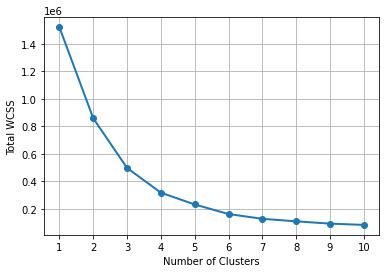

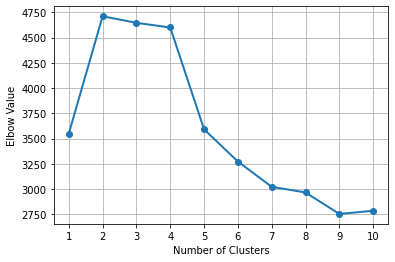

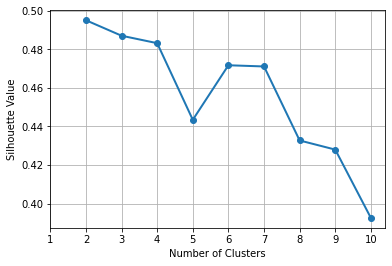

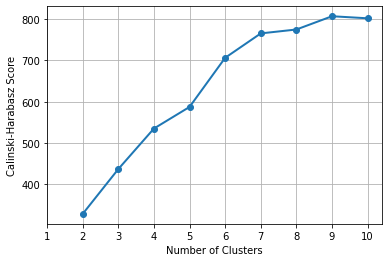

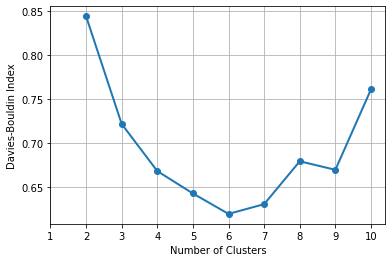

In [236]:
plt.plot(nClusters, TotalWCSS, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Total WCSS")
plt.xticks(np.arange(1, maxNClusters+1, step = 1))
plt.show()

plt.plot(nClusters, Elbow, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Elbow Value")
plt.xticks(np.arange(1, maxNClusters+1, step = 1))
plt.show()

plt.plot(nClusters, Silhouette, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Value")
plt.xticks(np.arange(1, maxNClusters+1, step = 1))
plt.show()   

plt.plot(nClusters, Calinski_Harabasz, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.xticks(np.arange(1, maxNClusters+1, step = 1))
plt.show()

plt.plot(nClusters, Davies_Bouldin, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.xticks(np.arange(1, maxNClusters+1, step = 1))
plt.show()   
